# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Remove predictors with p-values too high and refit the model
* Examine and interpret the model results
* Split data into training and testing sets
* Fit a regression model to the data set using statsmodel library


## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)" then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols

In [2]:
ls

CONTRIBUTING.md  index.ipynb               LICENSE.md
index_files/     Lego_dataset_cleaned.csv  README.md


In [3]:
df = pd.read_csv("Lego_dataset_cleaned.csv")

In [4]:
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [5]:
import re

In [6]:
df.columns = [''.join([s for s in column if s.isalnum()]) for column in df.columns]

In [7]:
df.columns = [re.sub('[^A-Za-z0-9]+', '', column) for column in df.columns]

In [8]:
target = "listprice"
predictors = [x for x in df.columns if x != target]

In [9]:
import sklearn.model_selection

In [10]:
X, y = df[predictors], df[target]

In [11]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
train_df = pd.concat([X_train, y_train], axis=1)

In [13]:
#Fitting the actual model
formula = target + "~" + '+'.join(predictors)
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listprice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     498.6
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:36:22   Log-Likelihood:                -36159.
No. Observations:                7282   AIC:                         7.251e+04
Df Residuals:                    7187   BIC:                         7.316e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     64.6104      1.893     34.135      0.000      60.900      68.321
piececount                                    75.5374      0.942     80.172      0.000      73.690      77.384
numreviews                                     7.5012      0.731     10.266      0.000       6.069       8.934
playstarrating                                 4.8509      0.662      7.323      0.000       3.552       6.150
starrating                                    -1.1070      0.751     -1.474      0.141      -2.579       0.365
valstarrating                                 -8.7383      0.676    -12.924      0.000     -10.064      -7.413
ages10                                       124.6781      7.386     16.880      0.000     110.199     139.157
ages1014                                     -22.9897      9.476     -2.426      0.015     -41.566      -4.413
ages1016                                     -12.2517      4.293     -2.854      0.004     -20.668      -3.836
ages1021                                      52.7748      8.274      6.378      0.000      36.556      68.994
ages1116                                     -14.8526      6.190     -2.399      0.016     -26.988      -2.717
ages12                                        72.3480      6.244     11.586      0.000      60.107      84.589
ages1216                                     -51.7919      7.012     -7.387      0.000     -65.537     -38.047
ages14                                        20.1510      4.279      4.709      0.000      11.762      28.540
ages16                                        33.3131      6.532      5.100      0.000      20.509      46.117
ages13                                        -9.3803      2.481     -3.780      0.000     -14.245      -4.516
ages15                                        -4.9991      3.251     -1.538      0.124     -11.372       1.373
ages25                                        16.1243      1.774      9.089      0.000      12.647      19.602
ages4                                        -21.4031      6.525     -3.280      0.001     -34.193      -8.613
ages47                                        -6.3631      3.279     -1.941      0.052     -12.791       0.065
ages499                                       -1.8453      3.726     -0.495      0.620      -9.150       5.460
ages5                                         -8.9905      3.184     -2.823      0.005     -15.232      -2.749
ages512                                      -34.8167      3.310    -10.520      0.000     -41.305     -28.329
ages58                                         7.1149      5.845      1.217      0.224      -4.343      18.573
ages6                                        -27.1421      5.868     -4.625      0.000

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [14]:
uninfluential_features = model.pvalues[model.pvalues > 0.05]

In [15]:
for feature in list(uninfluential_features.keys()):
    predictors.remove(feature)

In [16]:
#Fitting the actual model
formula = target + "~" + '+'.join(predictors)
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listprice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     688.9
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:36:28   Log-Likelihood:                -36171.
No. Observations:                7282   AIC:                         7.248e+04
Df Residuals:                    7213   BIC:                         7.296e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     64.0059      1.612     39.695      0.000      60.845      67.167
piececount                                    75.7949      0.920     82.419      0.000      73.992      77.598
numreviews                                     7.4342      0.716     10.384      0.000       6.031       8.838
playstarrating                                 4.4304      0.554      7.994      0.000       3.344       5.517
valstarrating                                 -9.1743      0.529    -17.335      0.000     -10.212      -8.137
ages10                                       121.8501      5.390     22.605      0.000     111.283     132.417
ages1014                                     -16.5878      9.832     -1.687      0.092     -35.862       2.686
ages1016                                      -6.9868      4.063     -1.720      0.086     -14.952       0.978
ages1021                                      46.7999      3.477     13.458      0.000      39.983      53.617
ages1116                                     -10.2168      6.022     -1.697      0.090     -22.021       1.587
ages12                                        74.3749      6.766     10.992      0.000      61.111      87.639
ages1216                                     -45.1378      7.303     -6.181      0.000     -59.453     -30.823
ages14                                        26.0498      4.933      5.281      0.000      16.380      35.720
ages16                                        37.4673      7.281      5.146      0.000      23.194      51.740
ages13                                        -2.0184      3.155     -0.640      0.522      -8.202       4.166
ages25                                        22.7712      2.076     10.969      0.000      18.702      26.841
ages4                                        -21.5403      9.948     -2.165      0.030     -41.042      -2.038
ages5                                         -7.6352      3.122     -2.445      0.014     -13.756      -1.515
ages512                                      -27.3756      2.840     -9.639      0.000     -32.943     -21.808
ages6                                        -20.1873      5.755     -3.508      0.000     -31.469      -8.906
ages612                                      -14.8325      1.959     -7.573      0.000     -18.672     -10.993
ages712                                      -13.9038      2.304     -6.036      0.000     -18.419      -9.388
ages714                                      -10.2149      2.004     -5.098      0.000     -14.143      -6.287
ages8                                         14.9444      4.779      3.127      0.002       5.576      24.313
ages812                                      -14.5130      2.891     -5.021      0.000

In [17]:
uninfluential_features = model.pvalues[model.pvalues > 0.05]

In [18]:
uninfluential_features

ages1014                        0.091626
ages1016                        0.085552
ages1116                        0.089794
ages13                          0.522300
ages914                         0.208225
themenameDCComicsSuperHeroes    0.052047
themenameStygimolochBreakout    0.081700
countryBE                       0.185189
countryDE                       0.221756
countryFR                       0.091591
countryNL                       0.097842
dtype: float64

In [19]:
for feature in list(uninfluential_features.keys()):
    predictors.remove(feature)

In [20]:
#Fitting the actual model
formula = target + "~" + '+'.join(predictors)
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listprice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     820.5
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:36:29   Log-Likelihood:                -36182.
No. Observations:                7282   AIC:                         7.248e+04
Df Residuals:                    7224   BIC:                         7.288e+04
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     63.3540      1.242     51.018      0.000      60.920      65.788
piececount                                    75.1437      0.835     89.969      0.000      73.506      76.781
numreviews                                     7.3650      0.712     10.344      0.000       5.969       8.761
playstarrating                                 4.6096      0.548      8.409      0.000       3.535       5.684
valstarrating                                 -9.2514      0.525    -17.639      0.000     -10.280      -8.223
ages10                                       124.4001      5.256     23.669      0.000     114.097     134.703
ages1021                                      48.0766      3.388     14.191      0.000      41.435      54.718
ages12                                        78.7705      6.432     12.246      0.000      66.161      91.380
ages1216                                     -40.5314      6.959     -5.825      0.000     -54.172     -26.891
ages14                                        31.3930      4.334      7.244      0.000      22.898      39.888
ages16                                        44.7540      6.429      6.961      0.000      32.151      57.357
ages25                                        24.1600      1.899     12.723      0.000      20.438      27.882
ages4                                        -21.1781      9.949     -2.129      0.033     -40.680      -1.676
ages5                                         -6.9595      3.098     -2.246      0.025     -13.033      -0.886
ages512                                      -25.2090      2.698     -9.344      0.000     -30.497     -19.921
ages6                                        -18.1686      5.688     -3.194      0.001     -29.318      -7.019
ages612                                      -12.0448      1.624     -7.418      0.000     -15.228      -8.862
ages712                                      -11.7754      2.033     -5.792      0.000     -15.761      -7.790
ages714                                       -7.9765      1.730     -4.609      0.000     -11.369      -4.584
ages8                                         16.2630      4.736      3.434      0.001       6.979      25.547
ages812                                      -12.1953      2.605     -4.681      0.000     -17.302      -7.089
ages814                                       -6.4010      1.721     -3.720      0.000      -9.774      -3.028
ages9                                        110.5460     11.514      9.601      0.000      87.976     133.116
ages912                                      -21.0681      6.504     -3.239      0.001     -33.817      -8.319
themenameArchitecture                        -91.7570      7.065    -12.987      0.000

In [21]:
uninfluential_features = model.pvalues[model.pvalues > 0.05]

In [22]:
uninfluential_features

countryES                          0.132141
countryLU                          0.087768
countryNZ                          0.085330
countryPL                          0.075409
reviewdifficultyVeryChallenging    0.055844
dtype: float64

In [23]:
for feature in list(uninfluential_features.keys()):
    predictors.remove(feature)

In [24]:
#Fitting the actual model
formula = target + "~" + '+'.join(predictors)
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listprice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     898.2
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:36:30   Log-Likelihood:                -36188.
No. Observations:                7282   AIC:                         7.248e+04
Df Residuals:                    7229   BIC:                         7.285e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     64.2807      1.204     53.403      0.000      61.921      66.640
piececount                                    75.1336      0.836     89.915      0.000      73.496      76.772
numreviews                                     7.1556      0.702     10.193      0.000       5.779       8.532
playstarrating                                 4.6582      0.547      8.508      0.000       3.585       5.731
valstarrating                                 -9.2339      0.525    -17.597      0.000     -10.263      -8.205
ages10                                       124.8565      5.256     23.757      0.000     114.554     135.159
ages1021                                      48.0911      3.389     14.191      0.000      41.448      54.734
ages12                                        79.4997      6.425     12.374      0.000      66.906      92.094
ages1216                                     -40.0665      6.957     -5.759      0.000     -53.704     -26.429
ages14                                        34.1458      4.085      8.359      0.000      26.139      42.153
ages16                                        45.9570      6.403      7.178      0.000      33.406      58.508
ages25                                        24.0027      1.899     12.639      0.000      20.280      27.726
ages4                                        -19.8347      9.936     -1.996      0.046     -39.312      -0.357
ages5                                         -7.0294      3.100     -2.268      0.023     -13.106      -0.953
ages512                                      -25.2713      2.699     -9.363      0.000     -30.562     -19.980
ages6                                        -18.2196      5.690     -3.202      0.001     -29.373      -7.066
ages612                                      -12.1479      1.624     -7.479      0.000     -15.332      -8.964
ages712                                      -11.8987      2.033     -5.852      0.000     -15.884      -7.913
ages714                                       -8.0817      1.731     -4.669      0.000     -11.475      -4.688
ages8                                         16.1721      4.738      3.413      0.001       6.885      25.460
ages812                                      -12.2296      2.606     -4.692      0.000     -17.339      -7.121
ages814                                       -6.5035      1.721     -3.778      0.000      -9.878      -3.129
ages9                                        111.0179     11.517      9.639      0.000      88.440     133.595
ages912                                      -21.1190      6.507     -3.246      0.001     -33.874      -8.364
themenameArchitecture                        -92.4518      7.064    -13.089      0.000

In [25]:
uninfluential_features = model.pvalues[model.pvalues > 0.05]

In [26]:
uninfluential_features

countryCZ    0.062631
dtype: float64

In [27]:
for feature in list(uninfluential_features.keys()):
    predictors.remove(feature)

In [28]:
#Fitting the actual model
formula = target + "~" + '+'.join(predictors)
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listprice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     915.4
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:36:30   Log-Likelihood:                -36190.
No. Observations:                7282   AIC:                         7.248e+04
Df Residuals:                    7230   BIC:                         7.284e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     64.5078      1.198     53.860      0.000      62.160      66.856
piececount                                    75.1251      0.836     89.891      0.000      73.487      76.763
numreviews                                     7.1296      0.702     10.157      0.000       5.754       8.506
playstarrating                                 4.6553      0.548      8.502      0.000       3.582       5.729
valstarrating                                 -9.2374      0.525    -17.601      0.000     -10.266      -8.209
ages10                                       124.8127      5.256     23.745      0.000     114.509     135.117
ages1021                                      48.0884      3.389     14.188      0.000      41.444      54.733
ages12                                        79.3909      6.425     12.356      0.000      66.795      91.986
ages1216                                     -39.9655      6.958     -5.744      0.000     -53.605     -26.326
ages14                                        34.1147      4.085      8.350      0.000      26.106      42.123
ages16                                        46.0755      6.404      7.195      0.000      33.523      58.628
ages25                                        24.0176      1.899     12.645      0.000      20.294      27.741
ages4                                        -19.6476      9.937     -1.977      0.048     -39.128      -0.168
ages5                                         -7.0557      3.100     -2.276      0.023     -13.133      -0.979
ages512                                      -25.3386      2.699     -9.387      0.000     -30.630     -20.047
ages6                                        -18.1504      5.691     -3.189      0.001     -29.306      -6.995
ages612                                      -12.1614      1.625     -7.486      0.000     -15.346      -8.977
ages712                                      -11.9333      2.033     -5.869      0.000     -15.919      -7.947
ages714                                       -8.0904      1.731     -4.673      0.000     -11.484      -4.696
ages8                                         16.0825      4.738      3.394      0.001       6.794      25.371
ages812                                      -12.3060      2.606     -4.722      0.000     -17.415      -7.197
ages814                                       -6.5370      1.722     -3.797      0.000      -9.912      -3.162
ages9                                        110.8942     11.519      9.627      0.000      88.313     133.475
ages912                                      -21.2989      6.507     -3.273      0.001     -34.055      -8.543
themenameArchitecture                        -92.4436      7.065    -13.085      0.000

In [29]:
uninfluential_features = model.pvalues[model.pvalues > 0.05]

In [30]:
uninfluential_features

Series([], dtype: float64)

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extend of this problem.

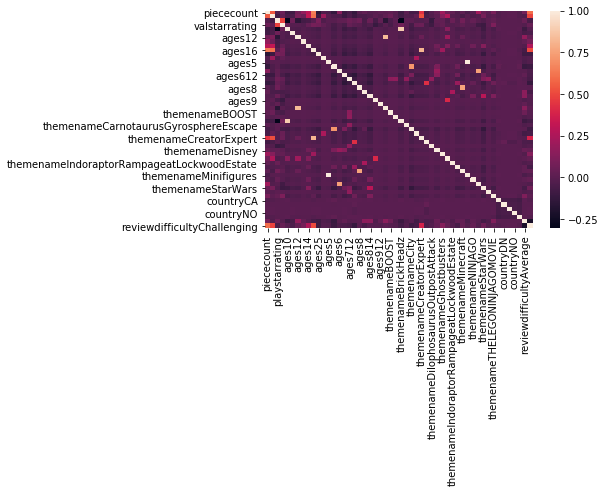

In [31]:
sns.heatmap(df[predictors].corr())

In [32]:
import numpy as np

In [33]:
df[predictors].corr().sum().abs().sort_values(ascending=False).keys()

Index(['piececount', 'numreviews', 'ages16', 'reviewdifficultyChallenging',
       'themenameCreatorExpert', 'ages14', 'themenameIdeas', 'ages5',
       'themenameMinifigures', 'themenameGhostbusters', 'ages12',
       'valstarrating', 'ages6', 'themenameSERIOUSPLAY', 'ages4', 'ages25',
       'themenameMinecraft', 'themenameArchitecture',
       'themenameIndoraptorRampageatLockwoodEstate', 'themenameBOOST', 'ages9',
       'ages8', 'themenameDisney', 'ages612', 'themenameTrexTransport',
       'themenameCarnotaurusGyrosphereEscape',
       'themenameBluesHelicopterPursuit', 'ages1216',
       'reviewdifficultyAverage', 'countryDN', 'countryFI', 'countryNO',
       'playstarrating', 'countryUS', 'countryCA',
       'themenameDilophosaurusOutpostAttack', 'ages912',
       'themenameTHELEGONINJAGOMOVIE', 'ages712', 'ages714',
       'themenameNINJAGO', 'themenameMarvelSuperHeroes', 'themenameDIMENSIONS',
       'ages812', 'ages10', 'ages512', 'themenameBrickHeadz',
       'themenameStar

In [34]:
while df[predictors].corr().sum().abs().sort_values(ascending=False)[0] > 2:
    predictors.remove(df[predictors].corr().sum().abs().sort_values(ascending=False).keys()[0])

In [35]:
predictors

['playstarrating',
 'valstarrating',
 'ages10',
 'ages1021',
 'ages12',
 'ages1216',
 'ages14',
 'ages16',
 'ages25',
 'ages4',
 'ages5',
 'ages512',
 'ages6',
 'ages612',
 'ages712',
 'ages714',
 'ages8',
 'ages812',
 'ages814',
 'ages9',
 'ages912',
 'themenameArchitecture',
 'themenameBOOST',
 'themenameBluesHelicopterPursuit',
 'themenameBrickHeadz',
 'themenameCarnotaurusGyrosphereEscape',
 'themenameCity',
 'themenameClassic',
 'themenameCreatorExpert',
 'themenameDIMENSIONS',
 'themenameDilophosaurusOutpostAttack',
 'themenameDisney',
 'themenameGhostbusters',
 'themenameIdeas',
 'themenameIndoraptorRampageatLockwoodEstate',
 'themenameMarvelSuperHeroes',
 'themenameMinecraft',
 'themenameMinifigures',
 'themenameNINJAGO',
 'themenameSERIOUSPLAY',
 'themenameStarWars',
 'themenameTrexTransport',
 'themenameTHELEGONINJAGOMOVIE',
 'countryCA',
 'countryDN',
 'countryFI',
 'countryNO',
 'countryUS',
 'reviewdifficultyAverage',
 'reviewdifficultyChallenging']

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [36]:
#Fitting the actual model
formula = target + "~" + '+'.join(predictors)
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              listprice   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     371.0
Date:                Wed, 05 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:36:40   Log-Likelihood:                -38930.
No. Observations:                7282   AIC:                         7.796e+04
Df Residuals:                    7232   BIC:                         7.830e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     42.5857      1.689     25.214      0.000      39.275      45.897
playstarrating                                 5.4301      0.797      6.809      0.000       3.867       6.993
valstarrating                                 -7.8990      0.763    -10.351      0.000      -9.395      -6.403
ages10                                        95.4208      7.581     12.586      0.000      80.559     110.283
ages1021                                      18.8217      4.914      3.830      0.000       9.189      28.455
ages12                                       226.7381      9.051     25.051      0.000     208.996     244.481
ages1216                                     140.8492      9.683     14.546      0.000     121.867     159.831
ages14                                       178.3722      5.184     34.410      0.000     168.211     188.534
ages16                                       399.5848      6.909     57.834      0.000     386.041     413.129
ages25                                        -1.6204      2.735     -0.592      0.554      -6.983       3.742
ages4                                         -6.2266     13.621     -0.457      0.648     -32.928      20.475
ages5                                        -18.5265      4.510     -4.108      0.000     -27.368      -9.685
ages512                                      -59.1570      3.894    -15.194      0.000     -66.789     -51.524
ages6                                        -43.8983      8.278     -5.303      0.000     -60.127     -27.670
ages612                                      -29.6750      2.347    -12.641      0.000     -34.277     -25.073
ages712                                      -24.3947      2.955     -8.256      0.000     -30.187     -18.602
ages714                                      -21.7362      2.512     -8.652      0.000     -26.661     -16.811
ages8                                         24.9204      6.901      3.611      0.000      11.393      38.447
ages812                                       -6.6034      3.794     -1.740      0.082     -14.041       0.834
ages814                                      -13.8368      2.505     -5.524      0.000     -18.747      -8.926
ages9                                        142.8220     16.575      8.617      0.000     110.330     175.314
ages912                                        6.3801      9.468      0.674      0.500     -12.179      24.939
themenameArchitecture                       -235.8647     10.020    -23.540      0.000    -255.506    -216.223
themenameBOOST                               141.2574     15.649      9.027      0.000     110.581     171.933
themenameBluesHelicopterPursuit               43.6420     12.640      3.453      0.001

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

(array([6.000e+00, 1.800e+01, 1.700e+01, 5.200e+01, 4.880e+02, 6.355e+03,
        3.040e+02, 2.900e+01, 0.000e+00, 1.300e+01]),
 array([-551.16379208, -450.08146044, -348.9991288 , -247.91679716,
        -146.83446552,  -45.75213388,   55.33019776,  156.4125294 ,
         257.49486104,  358.57719268,  459.65952432]),
 <a list of 10 Patch objects>)

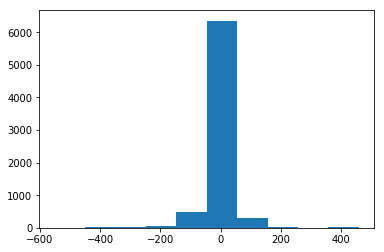

In [43]:
plt.hist(model.predict(exog=X_train)-y_train)

(array([6.00e+00, 7.00e+00, 2.00e+01, 5.70e+01, 1.19e+03, 2.24e+03,
        5.80e+01, 2.00e+00, 0.00e+00, 8.00e+00]),
 array([-468.59956846, -375.9993406 , -283.39911275, -190.79888489,
         -98.19865704,   -5.59842918,   87.00179868,  179.60202653,
         272.20225439,  364.80248224,  457.4027101 ]),
 <a list of 10 Patch objects>)

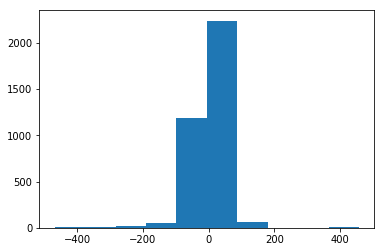

In [42]:
plt.hist(model.predict(exog=X_test)-y_test)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

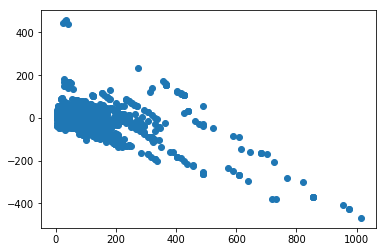

In [44]:
plt.scatter(y_train, model.predict(exog=X_test)-y_test)

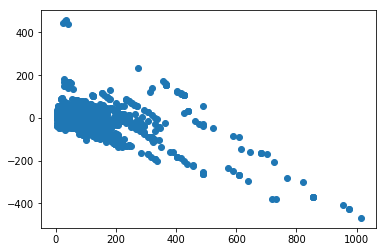

In [44]:
plt.scatter(y_test, model.predict(exog=X_test)-y_test)

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the list_price increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confiding the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least 2 additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [ ]:
#Your code here

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches and make ongoing refinements. These choices depend on the context and specific use cases. 